# Simplified Approach to Web Scrapping

** Published By: Demola Malomo **

**Web Scrapping** simply means extracting ( or SCRAPE) data from a website. Although,  we have a lot of already developed apps to scrape data from the internet, which comes with restrictions like cost, data access limitation, pre-registration e.t.c. Being able to develop a simple **Web Scrapper** gives the flexibilty required in extracting data, zero cost implication and save locally or on a database.

**Why Web Scrapping ?**

There are numerous uses of web scrapping in both business and automating our day-to-day activities. Here are few  application of web scrapping:
-  Extraction of Data for research and analysis
-  Datasets Training in Machine Learning and Artificial Intelligence
-  Sales Intelligence 
-  Price  Monitoring on sites like ebay, amazon, etc.
-  Sales and Marketing of Products to existing customers and potential customers


The codes and extracted dataset can be assesed via __[CodeLink](https://github.com/Mr-Malomz/Python-Published-Repo/tree/master/Web%20Scrapping)__

In this publication we will be extracting job details posted on __[HotNigeriaJobs](http://www.hotnigerianjobs.com)__



** 1. Inspect the website HTML **

Inspecting the embedded html codes inside a web page is an integral part of web scrapping. This will help us locate the sections in which the needed datas are located.

Accessing the webpage html codes (Using Google Chrome Browser) via:
**Customize and Control Google Chrome --> More Tools --> Developer Tools**

After properly examining the web page, the needed data is stored in the **"middlecol"** class as shown in the image below.

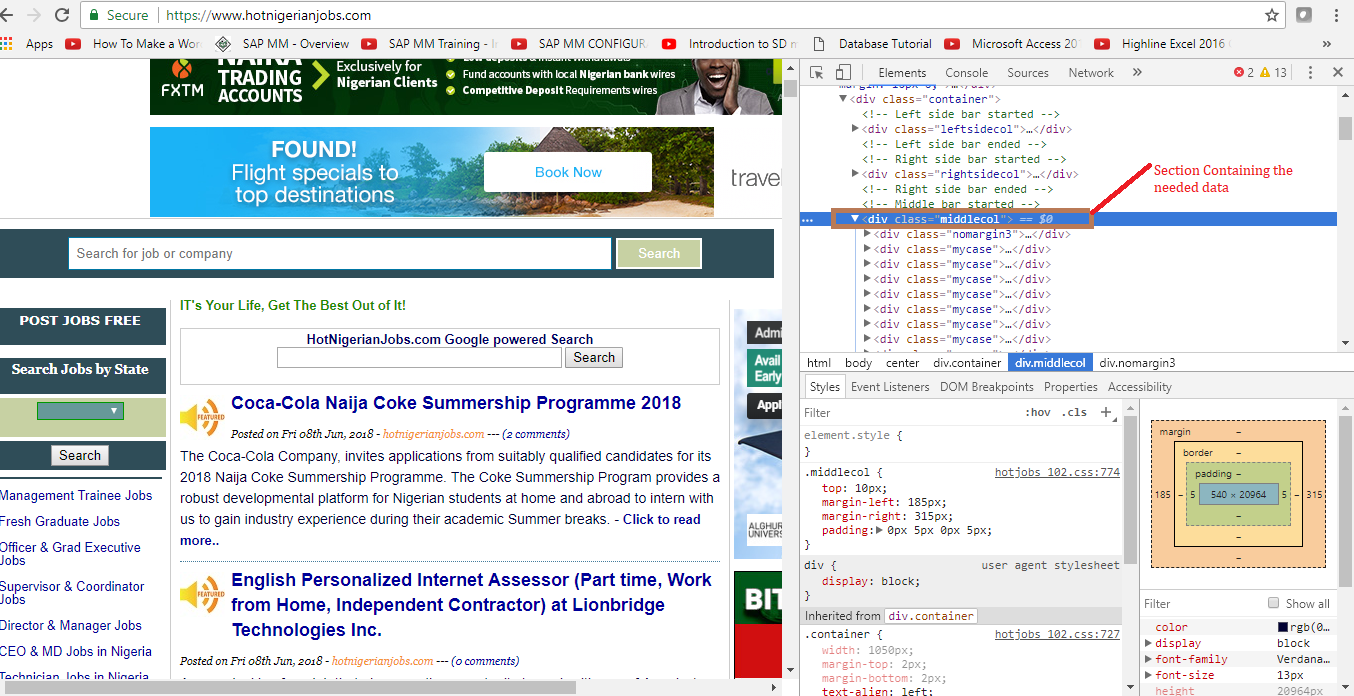


**2. Importing Python inbuilt web scrapping libraries**

In [1]:
#Request Library downloads the web page html codes
import requests

#Beautiful Soup Library is used for extracting data from html
from bs4 import BeautifulSoup 

#Regular Expression Library to transform text
import re

#Pandas Library is used to arrange extracted data
import pandas as pd

**3. Extract and Transform Data **

First, we extract the needed data from the web page

In [2]:
page = requests.get("https://www.hotnigerianjobs.com/")

In [3]:
#this code checks if the web page is downloaded without restriction
page.status_code

200

Extracting html content from the downloaded page

In [4]:
html = BeautifulSoup(page.content, "html.parser")

Now, we can extract the needed data from the class **"middlecol"** from the html 

In [5]:
data = html.find(class_= "middlecol" )

In [6]:
#we can preview to see extracted data
data

<div class="middlecol">
<div class="nomargin3">
<span class="greenbio">IT's Your Life, Get The Best Out of It!</span>
<br><br>
<div style="border:1px solid #ccc;padding:3px;text-align:center;">
<strong>HotNigerianJobs.com Google powered Search</strong><br>
<form action="https://www.google.com/cse" id="cse-search-box" target="_blank">
<div>
<input name="cx" type="hidden" value="partner-pub-8963620531447391:1aggctgcyip">
<input name="ie" type="hidden" value="ISO-8859-1">
<input name="q" size="36" type="text"/>
<input name="sa" type="submit" value="Search"/>
</input></input></div>
</form>
<script src="https://www.google.com/cse/brand?form=cse-search-box&amp;lang=en" type="text/javascript"></script>
</br></div>
</br></br></div> <div class="nomargin3">
<a class="poplight" href="#?w=320" rel="popup_name"></a>
<div class="popup_block" id="popup_name" style="display:none;">
<span align="right" valign="top"><a class="close" href="#"><img alt="close" class="btn_close" height="32" src="https://ww

Lets first extract all title of all the job posted

In [7]:
title_tag = data.select(" .mycase .jobheader")

In [8]:
#This code puts extracted data into a list
title = [dt.get_text() for dt in title_tag]

In [9]:
#Now lets preview extracted posted job title
title

['Christian Aid (CA) Fresh Job Recruitment (3 Positions)',
 'English Personalized Internet Assessor (Part time, Work from Home, Independent Contractor) at Lionbridge Technologies Inc.',
 'Coca-Cola Naija Coke Summership Programmes 2018',
 'Whole Health Desk Fresh Job Recruitment (3 Positions)',
 'Jireh Technologies Limited Fresh Graduate & Exp. Job Recruitment (4 Positions)',
 'FHI 360 Fresh Job Recruitment (10 Positions)',
 'Flour Mills of Nigeria Plc Fresh Job Recruitment (8 Positions)',
 'Jumia Nigeria Fresh Job Recruitment (7 Positions)',
 'ETAD Consult Fresh Graduate & Exp. Job Recruitment (9 Positions)',
 'Widows and Orphans Empowerment Organisation (WEWE) Fresh Job Recruitment (6 Positions)',
 'COOPI Cooperazione Internazionale Fresh Job Recruitment (6 Positions) ',
 'Risk Control Services Nigeria Limited Fresh Graduate & Exp. Job Recruitment (9 Positions)',
 'Total Secure Nigeria Limited Fresh Job Recruitment (4 Positions)',
 'APIN Public Health Initiatives (APIN) Fresh Job Rec

Secondly, we will extract link to apply for this jobs

In [10]:
link_tag = data.find_all(class_ = "mycase3")

In [11]:
link = [lk.find_all('a', href=True) for lk in link_tag]


In [12]:
#Now lets preview extracted links to the posted jobs
link

[[<a href="https://www.hotnigerianjobs.com/hotjobs/178363/christian-aid-ca-fresh-job-recruitment-3-positions.html" target="_blank">Click to read more..</a>],
 [<a href="https://www.hotnigerianjobs.com/hotjobs/178249/english-personalized-internet-assessor-at-lionbridge.html" target="_blank">Click to read more..</a>],
 [<a href="https://www.hotnigerianjobs.com/hotjobs/178273/naija-coke-summership-programme-2018.html" target="_blank">Click to read more..</a>],
 [<a href="https://www.hotnigerianjobs.com/hotjobs/178349/whole-health-desk-fresh-job-recruitment-3-position.html" target="_blank">Click to read more..</a>],
 [<a href="https://www.hotnigerianjobs.com/hotjobs/178356/jireh-technologies-limited-fresh-graduate-exp-job.html" target="_blank">Click to read more..</a>],
 [<a href="https://www.hotnigerianjobs.com/hotjobs/178271/fhi-360-fresh-job-recruitment-7-positions.html" target="_blank">Click to read more..</a>],
 [<a href="https://www.hotnigerianjobs.com/hotjobs/178110/flour-mills-of-n

In [13]:
#lets format the link to get rid of unwanted text
links= []
for lkt in link:
    lnked = str(lkt).strip('[<a href="https://=target="_blank">Click to read more..</a>]')
    #the code below puts the formated text back in a link
    links.append(lnked)

In [14]:
#Now lets preview formatted links 
links

['www.hotnigerianjobs.com/hotjobs/178363/christian-aid-ca-fresh-job-recruitment-3-',
 'www.hotnigerianjobs.com/hotjobs/178249/english-personalized-internet-assessor-at-',
 'www.hotnigerianjobs.com/hotjobs/178273/naija-coke-summership-programme-2018',
 'www.hotnigerianjobs.com/hotjobs/178349/whole-health-desk-fresh-job-recruitment-3-',
 'www.hotnigerianjobs.com/hotjobs/178356/jireh-technologies-limited-fresh-graduate-exp-j',
 'www.hotnigerianjobs.com/hotjobs/178271/fhi-360-fresh-job-recruitment-7-',
 'www.hotnigerianjobs.com/hotjobs/178110/flour-mills-of-nigeria-plc-fresh-job-recru',
 'www.hotnigerianjobs.com/hotjobs/178219/jumia-nigeria-fresh-job-recruitment-8-',
 'www.hotnigerianjobs.com/hotjobs/178314/etad-consult-fresh-graduate-exp-job-recruitment-9',
 'www.hotnigerianjobs.com/hotjobs/178209/widows-and-orphans-empowerment-organisation-wewe-',
 'www.hotnigerianjobs.com/hotjobs/178186/coopi-cooperazione-internazionale-fresh-job-recru',
 'www.hotnigerianjobs.com/hotjobs/178193/risk-con

Lets also extract a short description of the job posted so we can have an insight into the various job posted

In [15]:
desc_tag = data.find_all(class_="mycase4")

In [16]:
#lets put extracted class into a list and convert to list
description = [desc.get_text() for desc in desc_tag]

In [17]:
#lets preview extracted text
description

['\r\n\t\t\t\t\t\t\tChristian Aid (CA), is currently recruiting suitably qualified candidates to fill the following positions below:  - Click to read more..\n\n',
 "\r\n\t\t\t\t\t\t\tAre you looking for a job that gives you the opportunity to work with one of America's top 100 most trusted Companies while also increasing your income from the comfort of your home?  Then why not join Lionbridge as a part-time Independent Contractor. We are currently recruiting for the role of English Speaking Personalized Internet Assessor in Nigeria. Interested candidates should be based in Nigeria. - Click to read more..\n\n",
 '\r\n\t\t\t\t\t\t\tThe Coca-Cola Company, invites applications from suitably qualified candidates for its 2018 Naija Coke Summership Programmes in the following departments: Finance, Sales, Marketing, Procurement, Logistics, Manufacturing, Human Resources, etc.\r\n - Click to read more..\n\n',
 '\r\n\t\t\t\t\t\t\tWhole Health Desk, invites applications from suitably qualified ca

In [18]:
#Lets format the extracted text to get rid of unwanted characters 
desc_job = []

for desc in description:
    describe = str(desc).strip()
    #lets put the formatted text back into a list
    desc_job.append(describe)

In [19]:
#lets preview formatted text
desc_job

['Christian Aid (CA), is currently recruiting suitably qualified candidates to fill the following positions below:  - Click to read more..',
 "Are you looking for a job that gives you the opportunity to work with one of America's top 100 most trusted Companies while also increasing your income from the comfort of your home?  Then why not join Lionbridge as a part-time Independent Contractor. We are currently recruiting for the role of English Speaking Personalized Internet Assessor in Nigeria. Interested candidates should be based in Nigeria. - Click to read more..",
 'The Coca-Cola Company, invites applications from suitably qualified candidates for its 2018 Naija Coke Summership Programmes in the following departments: Finance, Sales, Marketing, Procurement, Logistics, Manufacturing, Human Resources, etc.\r\n - Click to read more..',
 'Whole Health Desk, invites applications from suitably qualified candidates for the following positions below: - Click to read more..',
 'Jireh Technol

**Finally lets load the extracted data into a Dataframe and save it locally**

The reason we kept converting extracted data into list is to easily input it into a dataframe. 

In [20]:
#First we load the extracted data as a dictionary
Job_Frame = pd.DataFrame({ "Job Title" : title,
                          "Link": links,
                          "Job_Description" : desc_job})

In [21]:
Job_Frame

,Job Title,Job_Description,Link
0,Christian Aid (CA) Fresh Job Recruitment (3 Po...,"Christian Aid (CA), is currently recruiting su...",www.hotnigerianjobs.com/hotjobs/178363/christi...
1,English Personalized Internet Assessor (Part t...,Are you looking for a job that gives you the o...,www.hotnigerianjobs.com/hotjobs/178249/english...
2,Coca-Cola Naija Coke Summership Programmes 2018,"The Coca-Cola Company, invites applications fr...",www.hotnigerianjobs.com/hotjobs/178273/naija-c...
3,Whole Health Desk Fresh Job Recruitment (3 Pos...,"Whole Health Desk, invites applications from s...",www.hotnigerianjobs.com/hotjobs/178349/whole-h...
4,Jireh Technologies Limited Fresh Graduate & Ex...,"Jireh Technologies Limited, is recruiting to f...",www.hotnigerianjobs.com/hotjobs/178356/jireh-t...
5,FHI 360 Fresh Job Recruitment (10 Positions),"FHI 360, is recruiting for suitably qualified ...",www.hotnigerianjobs.com/hotjobs/178271/fhi-360...
6,Flour Mills of Nigeria Plc Fresh Job Recruitme...,"Flour Mills of Nigeria Plc, is recruiting suit...",www.hotnigerianjobs.com/hotjobs/178110/flour-m...
7,Jumia Nigeria Fresh Job Recruitment (7 Positions),"Jumia Nigeria, a leading global incubator of s...",www.hotnigerianjobs.com/hotjobs/178219/jumia-n...
8,ETAD Consult Fresh Graduate & Exp. Job Recruit...,"ETAD Consult, is recruiting on behalf of its c...",www.hotnigerianjobs.com/hotjobs/178314/etad-co...
9,Widows and Orphans Empowerment Organisation (W...,Widows and Orphans Empowerment Organisation (W...,www.hotnigerianjobs.com/hotjobs/178209/widows-...


Now lets save it locally on our machine

In [22]:
Job_Frame.to_csv("C:\\Users\\Malomz\\Desktop\\HotNigJob.csv", sep = ",")